In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report  # Corrected import statements
import re
import string

In [7]:
import mysql.connector as sql
import pandas as pd
db_connection = sql.connect(host='localhost', database='aiml_project', user='root', password='vipin965')
query="SELECT * FROM fake"
df_fake = pd.read_sql(query, con = db_connection)
df_fake

C:\Users\vipin\AppData\Local\Temp\ipykernel_26220\1253996109.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_fake = pd.read_sql(query, con = db_connection)


title  \
0     Donald Trump Sends Out Embarrassing New Yearâ...   
1     Drunk Bragging Trump Staffer Started Russian ...   
2     Sheriff David Clarke Becomes An Internet Joke...   
3     Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4     Pope Francis Just Called Out Donald Trump Dur...   
..                                                 ...   
824   Trumpâ€™s Department Of Justice Just Made A M...   
825   Co-Chair Of Trumpâ€™s Voter Fraud Commission ...   
826   Here Are 12 Tweets Trump DEFINITELY Regrets S...   
827   Rupert Murdoch Told Roger Ailes To Help Elect...   
828   Donald Trump Is Clearly Panicking; Avoiding T...   

                                                  text subject  \
0    Donald Trump just couldn t wish all Americans ...    News   
1    House Intelligence Committee Chairman Devin Nu...    News   
2    On Friday, it was revealed that former Milwauk...    News   
3    On Christmas day, Donald Trump announced that ...    News   
4    Pope Francis used his annual Christmas Day mes...    News   
..                                                 ...     ...   
824  Republicans and Democrats are upset over Attor...    News   
825  The co-chair of Trump s voter fraud commission...    News   
826  As you are probably aware, Donald Trump loves ...    News   
827  A new report has just revealed that Fox News p...    News   
828  Donald Trump s presidency is spiraling out of ...    News   

                  date  
0    December 31, 2017  
1    December 31, 2017  
2    December 30, 2017  
3    December 29, 2017  
4    December 25, 2017  
..                 ...  
824      July 19, 2017  
825      July 19, 2017  
826      July 19, 2017  
827      July 19, 2017  
828      July 19, 2017  

[829 rows x 4 columns]

In [8]:
df_fake.head(5)

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [9]:
import mysql.connector as sql
import pandas as pd
db_connection = sql.connect(host='localhost', database='aiml_project', user='root', password='vipin965')
query="SELECT * FROM vipin"
df_true = pd.read_sql(query, con = db_connection)
df_true

C:\Users\vipin\AppData\Local\Temp\ipykernel_26220\1158450869.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_true = pd.read_sql(query, con = db_connection)


title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [10]:
df_true.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [11]:
df_fake["class"] = 0
df_true['class'] = 1

In [12]:
df_fake.shape, df_true.shape

((829, 5), (21417, 5))

In [13]:
df_fake_manual_testing = df_fake.tail(5)
for i in range(828,823,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(5)
for i in range(21416,21411,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [14]:
df_fake

title  \
0     Donald Trump Sends Out Embarrassing New Yearâ...   
1     Drunk Bragging Trump Staffer Started Russian ...   
2     Sheriff David Clarke Becomes An Internet Joke...   
3     Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4     Pope Francis Just Called Out Donald Trump Dur...   
..                                                 ...   
819   Watch A GOP Member Of Science Committee Suffe...   
820   Trump Rips Sessions Over Russia, Says He Neve...   
821   BREAKING NEWS: John McCain Diagnosed With Ser...   
822   Trump Campaign Manager Was In Debt To Shady R...   
823   In White House Conference Call About Iran, St...   

                                                  text subject  \
0    Donald Trump just couldn t wish all Americans ...    News   
1    House Intelligence Committee Chairman Devin Nu...    News   
2    On Friday, it was revealed that former Milwauk...    News   
3    On Christmas day, Donald Trump announced that ...    News   
4    Pope Francis used his annual Christmas Day mes...    News   
..                                                 ...     ...   
819  It s no secret that Republicans seem to think ...    News   
820  Donald Trump is obsessed with the Russia inves...    News   
821  John McCain, the Panama-born senior United Sta...    News   
822  Recently, there have been an avalanche of reve...    News   
823  The contrast between the Obama White House and...    News   

                  date  class  
0    December 31, 2017      0  
1    December 31, 2017      0  
2    December 30, 2017      0  
3    December 29, 2017      0  
4    December 25, 2017      0  
..                 ...    ...  
819      July 19, 2017      0  
820      July 19, 2017      0  
821      July 19, 2017      0  
822      July 19, 2017      0  
823      July 19, 2017      0  

[824 rows x 5 columns]

In [15]:
df_true_manual_testing.head(10)

title  \
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  class  
21412  August 22, 2017       1  
21413  August 22, 2017       1  
21414  August 22, 2017       1  
21415  August 22, 2017       1  
21416  August 22, 2017       1

In [16]:
df_fake.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
5  December 25, 2017      0  
6  December 23, 2017      0  
7  December 23, 2017      0  
8  December 22, 2017      0  
9  December 21, 2017      0

In [17]:
df_fake_manual_testing.head(10)

title  \
824   Trumpâ€™s Department Of Justice Just Made A M...   
825   Co-Chair Of Trumpâ€™s Voter Fraud Commission ...   
826   Here Are 12 Tweets Trump DEFINITELY Regrets S...   
827   Rupert Murdoch Told Roger Ailes To Help Elect...   
828   Donald Trump Is Clearly Panicking; Avoiding T...   

                                                  text subject           date  \
824  Republicans and Democrats are upset over Attor...    News  July 19, 2017   
825  The co-chair of Trump s voter fraud commission...    News  July 19, 2017   
826  As you are probably aware, Donald Trump loves ...    News  July 19, 2017   
827  A new report has just revealed that Fox News p...    News  July 19, 2017   
828  Donald Trump s presidency is spiraling out of ...    News  July 19, 2017   

     class  
824      0  
825      0  
826      0  
827      0  
828      0

In [18]:
df_merge = pd.concat([df_fake, df_true],axis = 0)
df_merge.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
5  December 25, 2017      0  
6  December 23, 2017      0  
7  December 23, 2017      0  
8  December 22, 2017      0  
9  December 21, 2017      0

In [19]:
df_merge.columns 

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [20]:
df = df_merge.drop(['title','subject','date'], axis = 1)

In [21]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [22]:
df = df.sample(frac = 1)

In [23]:
df.head()

text  class
17888  TOKYO (Reuters) - Japan s Yuriko Koike says sh...      1
17964  ABUJA (Reuters) - The trial of more than 1,600...      1
5846   CHICAGO (Reuters) - Hundreds of medical studen...      1
70     The following statements were posted to the ve...      1
18315  TOKYO (Reuters) - U.S. President Donald Trump ...      1

In [24]:
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [25]:
df.columns

Index(['text', 'class'], dtype='object')

In [26]:
df.head()


text  class
0  TOKYO (Reuters) - Japan s Yuriko Koike says sh...      1
1  ABUJA (Reuters) - The trial of more than 1,600...      1
2  CHICAGO (Reuters) - Hundreds of medical studen...      1
3  The following statements were posted to the ve...      1
4  TOKYO (Reuters) - U.S. President Donald Trump ...      1

In [27]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('/n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [28]:
df['text'] = df['text'].apply(wordopt)

In [29]:
x = df['text']
y = df['class']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [33]:
pred_lr = LR.predict(xv_test)

In [34]:
LR.score(xv_test, y_test)

0.9843497031840259

In [35]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.64      0.78       236
           1       0.98      1.00      0.99      5323

    accuracy                           0.98      5559
   macro avg       0.99      0.82      0.88      5559
weighted avg       0.98      0.98      0.98      5559



In [36]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [37]:
pred_dt = DT.predict(xv_test)

In [38]:
DT.score(xv_test, y_test)

0.9983810037776578

In [39]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.64      0.78       236
           1       0.98      1.00      0.99      5323

    accuracy                           0.98      5559
   macro avg       0.99      0.82      0.88      5559
weighted avg       0.98      0.98      0.98      5559



In [40]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [41]:
pred_gb = GB.predict(xv_test)

In [42]:
GB.score(xv_test, y_test)

0.9978413383702105

In [43]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       236
           1       1.00      1.00      1.00      5323

    accuracy                           1.00      5559
   macro avg       0.98      0.99      0.99      5559
weighted avg       1.00      1.00      1.00      5559



In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
pred_rf = RF.predict(xv_test)

In [46]:
RF.score(xv_test, y_test)

0.9926245727648858

In [47]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90       236
           1       0.99      1.00      1.00      5323

    accuracy                           0.99      5559
   macro avg       1.00      0.91      0.95      5559
weighted avg       0.99      0.99      0.99      5559



In [48]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC prediction: {} ".format(output_label(pred_LR[0]),
                                                                                         output_label(pred_GB[0]),
                                                                                         output_label(pred_RF)))

In [51]:
news = str(input())
manual_testing(news)

The Pentagon is considering a Boeing proposal to supply Ukraine with cheap, small precision bombs fit ted on to abundantly available rockets, allowing Kyiv to strike far behind Russian lines, according t o a Reuters report. US and allied military inventories are shrinking, and Ukraine faces an increasin g need for more sophisticated weapons as the war drags on. Boeing's proposed system, dubbed Ground-La unched Small Diameter Bomb (GLSDB), is one of about a half-dozen plans for getting new munitions into production for Ukraine and America's eastern European allies, industry sources told the news agency. GLSDB could be delivered as early as spring 2023, according to a document reviewed by Reuters and the ee people familiar with the plan. It combines the GBU-39 Small Diameter Bomb (SDB) with the M26 rocke t motor, both of which are common in US inventories. Although a handful of GLSDB units have already been made, there are many logistical obstacles to formal procurement. The Boeing plan 

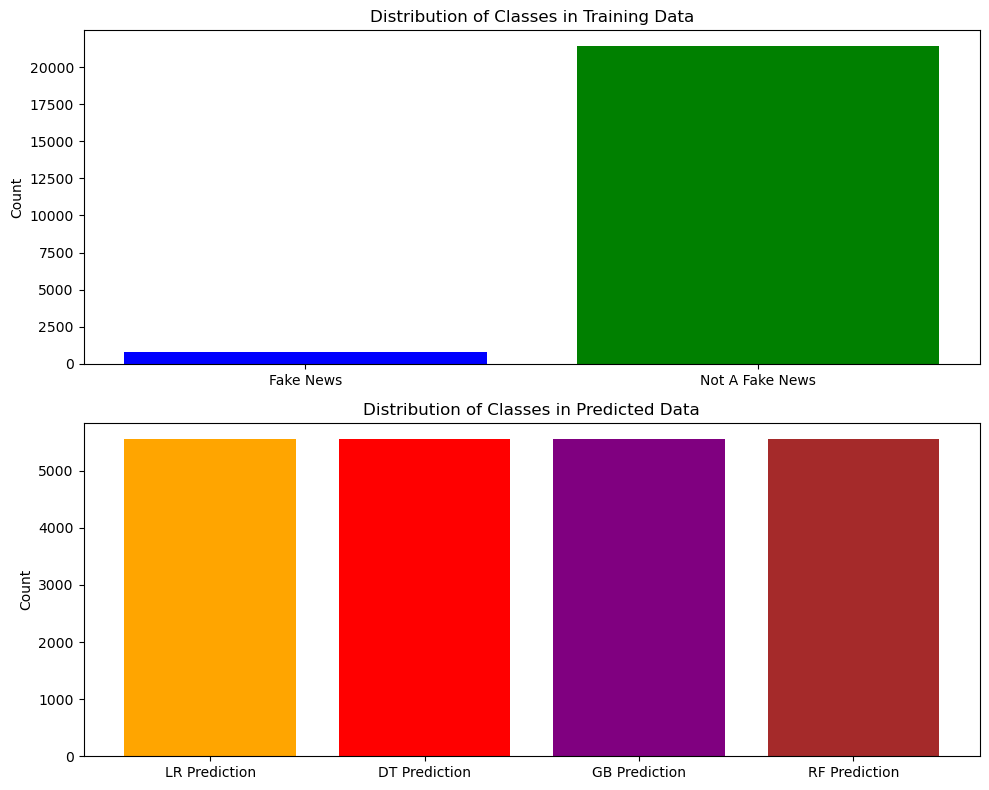

In [50]:
import matplotlib.pyplot as plt

# Data for training and predicted labels
training_labels = ['Fake News', 'Not A Fake News']
predicted_labels = ['LR Prediction', 'DT Prediction', 'GB Prediction', 'RF Prediction']

# Count of each class in training data
training_counts = [len(df[df['class'] == 0]), len(df[df['class'] == 1])]

# Combine counts from all classifiers for predicted data
predicted_counts = [
    sum([len(pred_lr[pred_lr == i]) for i in range(2)]),
    sum([len(pred_dt[pred_dt == i]) for i in range(2)]),
    sum([len(pred_gb[pred_gb == i]) for i in range(2)]),
    sum([len(pred_rf[pred_rf == i]) for i in range(2)])
]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot for training data
axs[0].bar(training_labels, training_counts, color=['blue', 'green'])
axs[0].set_title('Distribution of Classes in Training Data')
axs[0].set_ylabel('Count')

# Plot for predicted data
axs[1].bar(predicted_labels, predicted_counts, color=['orange', 'red', 'purple', 'brown'])
axs[1].set_title('Distribution of Classes in Predicted Data')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
